## **To prepare the colab notebook**

In [1]:
!ls

drive  sample_data


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import os
os.chdir("drive/My Drive/Papers and Stuff")

In [0]:
os.chdir("LLNet Implementation")

In [5]:
!ls

3layer_2000wt_best.model  Executer     llnet_predictor.ipynb  Test_Dataset
compressimages.py	  llnet.ipynb  Nature_Images_Dataset


## **Training the Model**

In [0]:
#Load images from a directory in python

#!/usr/bin/python
from os import listdir
from PIL import Image as PImage
#from IPython.display import Image              # to display the images if needed

def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)
        #Image(path + image)                # to display the images if needed
    return loadedImages

path = "./Nature_Images_Dataset/"

# your images in an array
imgs = loadImages(path)

In [0]:
import numpy as np
from sklearn.feature_extraction import image as imager
import random
import cv2
import matplotlib.pyplot as plt

In [0]:
imgs[0].size

(4928, 3264)

In [0]:
def adjust_gamma(image, gamma=1.0):
   invGamma = 1.0 / gamma
   table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

   return cv2.LUT(image, table)

X = []
Y = []
    
for image in imgs:
  foo = image.resize((300,300),PImage.ANTIALIAS)
  imgarr = np.array(foo)  
  patches = imager.extract_patches_2d(imgarr, (34, 34), max_patches = 145)
  Ys = patches/255
  gamma = 0.5  
  Xs = []

  for patch in patches:
    Xs.append(adjust_gamma(patch, gamma)/255)
  X.append(Xs)
  Y.append(Ys)

In [0]:
print(np.shape(X))
X = np.reshape(X, (-1,34,34,3))
print(X.shape)
Y = np.reshape(Y, (-1,34,34,3))
print(Y.shape)

(61, 145, 34, 34, 3)
(8845, 34, 34, 3)
(8845, 34, 34, 3)


In [0]:
X = np.array(X)
Y = np.array(Y)

In [0]:
from keras import models, layers
import keras

Using TensorFlow backend.


In [0]:
#a, b, c = 4000,3200,2400
a, b, c = 2000,1600,1400
#a, b, c, d = 8000, 6400, 4800, 3200                          # for the deeper net
#a, b, c, d = 4000, 3200, 2400, 1600

model = models.Sequential()
model.add(layers.Flatten(input_shape=[34,34,3]))
model.add(layers.Dense(a, activation="sigmoid"))
model.add(layers.Dense(b, activation="sigmoid"))
model.add(layers.Dense(c, activation="sigmoid"))
#model.add(layers.Dense(d, activation="sigmoid"))            # attempt to
#model.add(layers.Dense(c, activation="sigmoid"))            # increase the depth
model.add(layers.Dense(b, activation="sigmoid"))
model.add(layers.Dense(a, activation="sigmoid"))
model.add(layers.Dense(3468, activation="sigmoid"))
model.add(layers.Reshape([34,34,3]))

W0824 10:32:32.956915 140091466684288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0824 10:32:32.969038 140091466684288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 10:32:32.977175 140091466684288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3468)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              6938000   
_________________________________________________________________
dense_2 (Dense)              (None, 1600)              3201600   
_________________________________________________________________
dense_3 (Dense)              (None, 1400)              2241400   
_________________________________________________________________
dense_4 (Dense)              (None, 1600)              2241600   
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              3202000   
_________________________________________________________________
dense_6 (Dense)              (None, 3468)              6939468   
__________

In [0]:
model.compile(optimizer='adam', loss='mse')

W0824 10:32:33.050688 140091466684288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model.fit(X, Y, epochs = 100)

W0824 10:32:33.182631 140091466684288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0824 10:32:33.329155 140091466684288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/100
8845/8845 [==============================] - 8s 908us/step - loss: 0.0443
Epoch 2/100
8845/8845 [==============================] - 6s 689us/step - loss: 0.0256
Epoch 3/100
8845/8845 [==============================] - 6s 687us/step - loss: 0.0230
Epoch 4/100
8845/8845 [==============================] - 6s 686us/step - loss: 0.0219
Epoch 5/100
8845/8845 [==============================] - 6s 689us/step - loss: 0.0261
Epoch 6/100
8845/8845 [==============================] - 6s 689us/step - loss: 0.0247
Epoch 7/100
8845/8845 [==============================] - 6s 693us/step - loss: 0.0243
Epoch 8/100
8845/8845 [==============================] - 6s 693us/step - loss: 0.0210
Epoch 9/100
8845/8845 [==============================] - 6s 688us/step - loss: 0.0199
Epoch 10/100
8845/8845 [==============================] - 6s 688us/step - loss: 0.0190
Epoch 11/100
8845/8845 [==============================] - 6s 683us/step - loss: 0.0179
Epoch 12/100
8845/8845 [============================

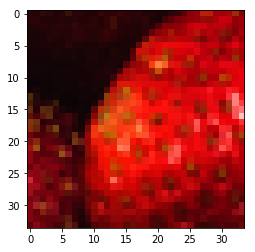

In [0]:
plt.imshow(X[100])

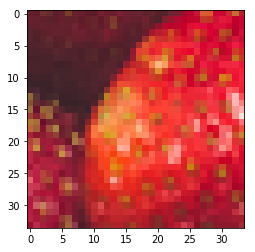

In [0]:
plt.imshow(Y[100])

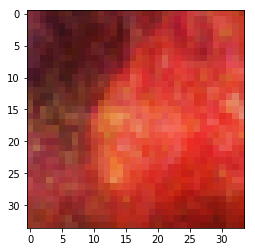

In [0]:
imgprs = model.predict(X[100:101])
imgpr = imgprs.squeeze()
plt.imshow(imgpr)

In [0]:
#model.save_weights('my_model_weights.h5')
model.save('3layer_2000wt_best.model')

# **Time to test it on the Test Dataset!**

In [8]:
from keras import models

new_model = models.load_model('3layer_2000wt_best.model')

W0824 12:05:31.429643 140523355547520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0824 12:05:31.452238 140523355547520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0824 12:05:32.590986 140523355547520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0824 12:05:32.592340 140523355547520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0824 12:05:32.593449 140523355547520 depre

In [0]:
#Load images from a directory in python

#!/usr/bin/python
from os import listdir
from PIL import Image as PImage

def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)
    return loadedImages

In [87]:
import numpy as np
import matplotlib.pyplot as plt

path = "./Test_Dataset/"

imgs = loadImages(path)

image = imgs[1]
foo = image.resize((340,340),PImage.ANTIALIAS)
fooarr = np.array(foo)

patches = []
for i in range(0,100):
  patches.append(fooarr[(i%10)*34:(i%10)*34+34, int(i/10)*34:int(i/10)*34+34, :])

patches = np.array(patches)
outpatches = new_model.predict(patches)
#outpatches = patches

print(outpatches.shape)

outimage = np.empty([340,340,3])
print(outimage.shape)
for j in range(0,100):
  #print(outpatches[j].shape)            #(34,34,3)
  outimage[(j%10)*34:(j%10)*34+34, int(j/10)*34:int(j/10)*34+34, :] = outpatches[j]

(100, 34, 34, 3)
(340, 340, 3)


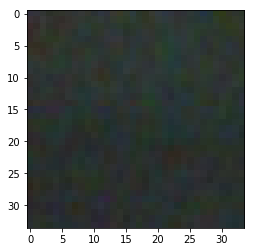

In [88]:
plt.imshow(patches[10])

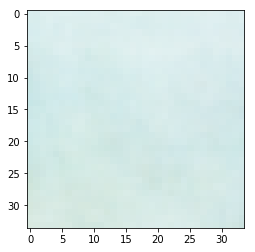

In [89]:
plt.imshow(outpatches[10])

In [90]:
import cv2
cv2.imwrite('2ndimg.jpg', outimage)
#print(outimage[306:340,306:340,:])
#print(outpatches[99])

True

True

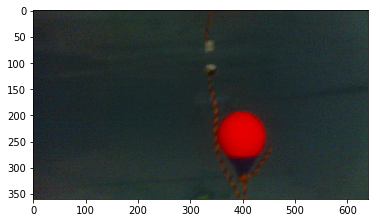

In [92]:
plt.imshow(image)
cv2.imwrite('2ndimg_input.png', fooarr)

(94249, 34, 34, 3)
(340, 340, 3)


W0824 11:37:31.296017 140091466684288 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


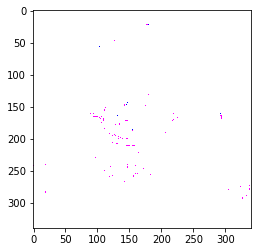

In [0]:
from sklearn.feature_extraction import image as SImage
from matplotlib import pyplot as plt

path = "./Test_Dataset/"

imgs = loadImages(path)

image = imgs[0]
foo = image.resize((340,340),PImage.ANTIALIAS)
fooarr = np.array(foo)

image_size = (340,340,3)
patch_size = (34,34)

#plt.imshow(fooarr)

patches = SImage.extract_patches_2d(fooarr, patch_size, max_patches=None, random_state=None)
print(patches.shape)
outimage = SImage.reconstruct_from_patches_2d(patches, image_size)
print(outimage.shape)
plt.imshow(outimage)

In [0]:
from matplotlib import pyplot as plt

#Reshape the test image into 340x340
path = "./Test_Dataset/"

imgs = loadImages(path)

image = imgs[0]

foo = image.resize((340,340),PImage.ANTIALIAS)
fooarr = np.array(foo)

#Cut it into 100 pieces
def patchify(img, patch_shape):
    img = np.ascontiguousarray(img)  # won't make a copy if not needed
    X, Y, c = img.shape
    x, y = patch_shape
    shape = ((X-x+1), (Y-y+1), x, y, c) # number of patches, patch_shape
    # The right strides can be thought by:
    # 1) Thinking of `img` as a chunk of memory in C order
    # 2) Asking how many items through that chunk of memory are needed when indices
    #    i,j,k,l are incremented by one
    strides = img.itemsize*np.array([Y, 1, Y, 1])
    return np.lib.stride_tricks.as_strided(img, shape=shape, strides=strides)

patches = patchify(fooarr, (34,34))
print(patches.shape)
#Pass it through the model
#Stick it back together again

ValueError: ignored